<a href="https://colab.research.google.com/github/Evvvvvvva0504/INFOSCI301_Infovis_Redesign_Project/blob/main/INFOSCI_301_Infovis_Redesign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 The Paper, Data/Code, and Selected Visualization

**Paper:** Lee, S.J., Cho, M., Kim, J. et al. Chromosome-level genome assembly and annotation of the Patagonian toothfish Dissostichus eleginoides. Sci Data 11, 1240 (2024). https://doi.org/10.1038/s41597-024-04119-w

**Data:** https://www.ebi.ac.uk/ena/browser/view/GCA_031216635.1 and https://www.ncbi.nlm.nih.gov/sra/SRP524971

**Code:** No GitHub repository found.

** Selected Visualization:**
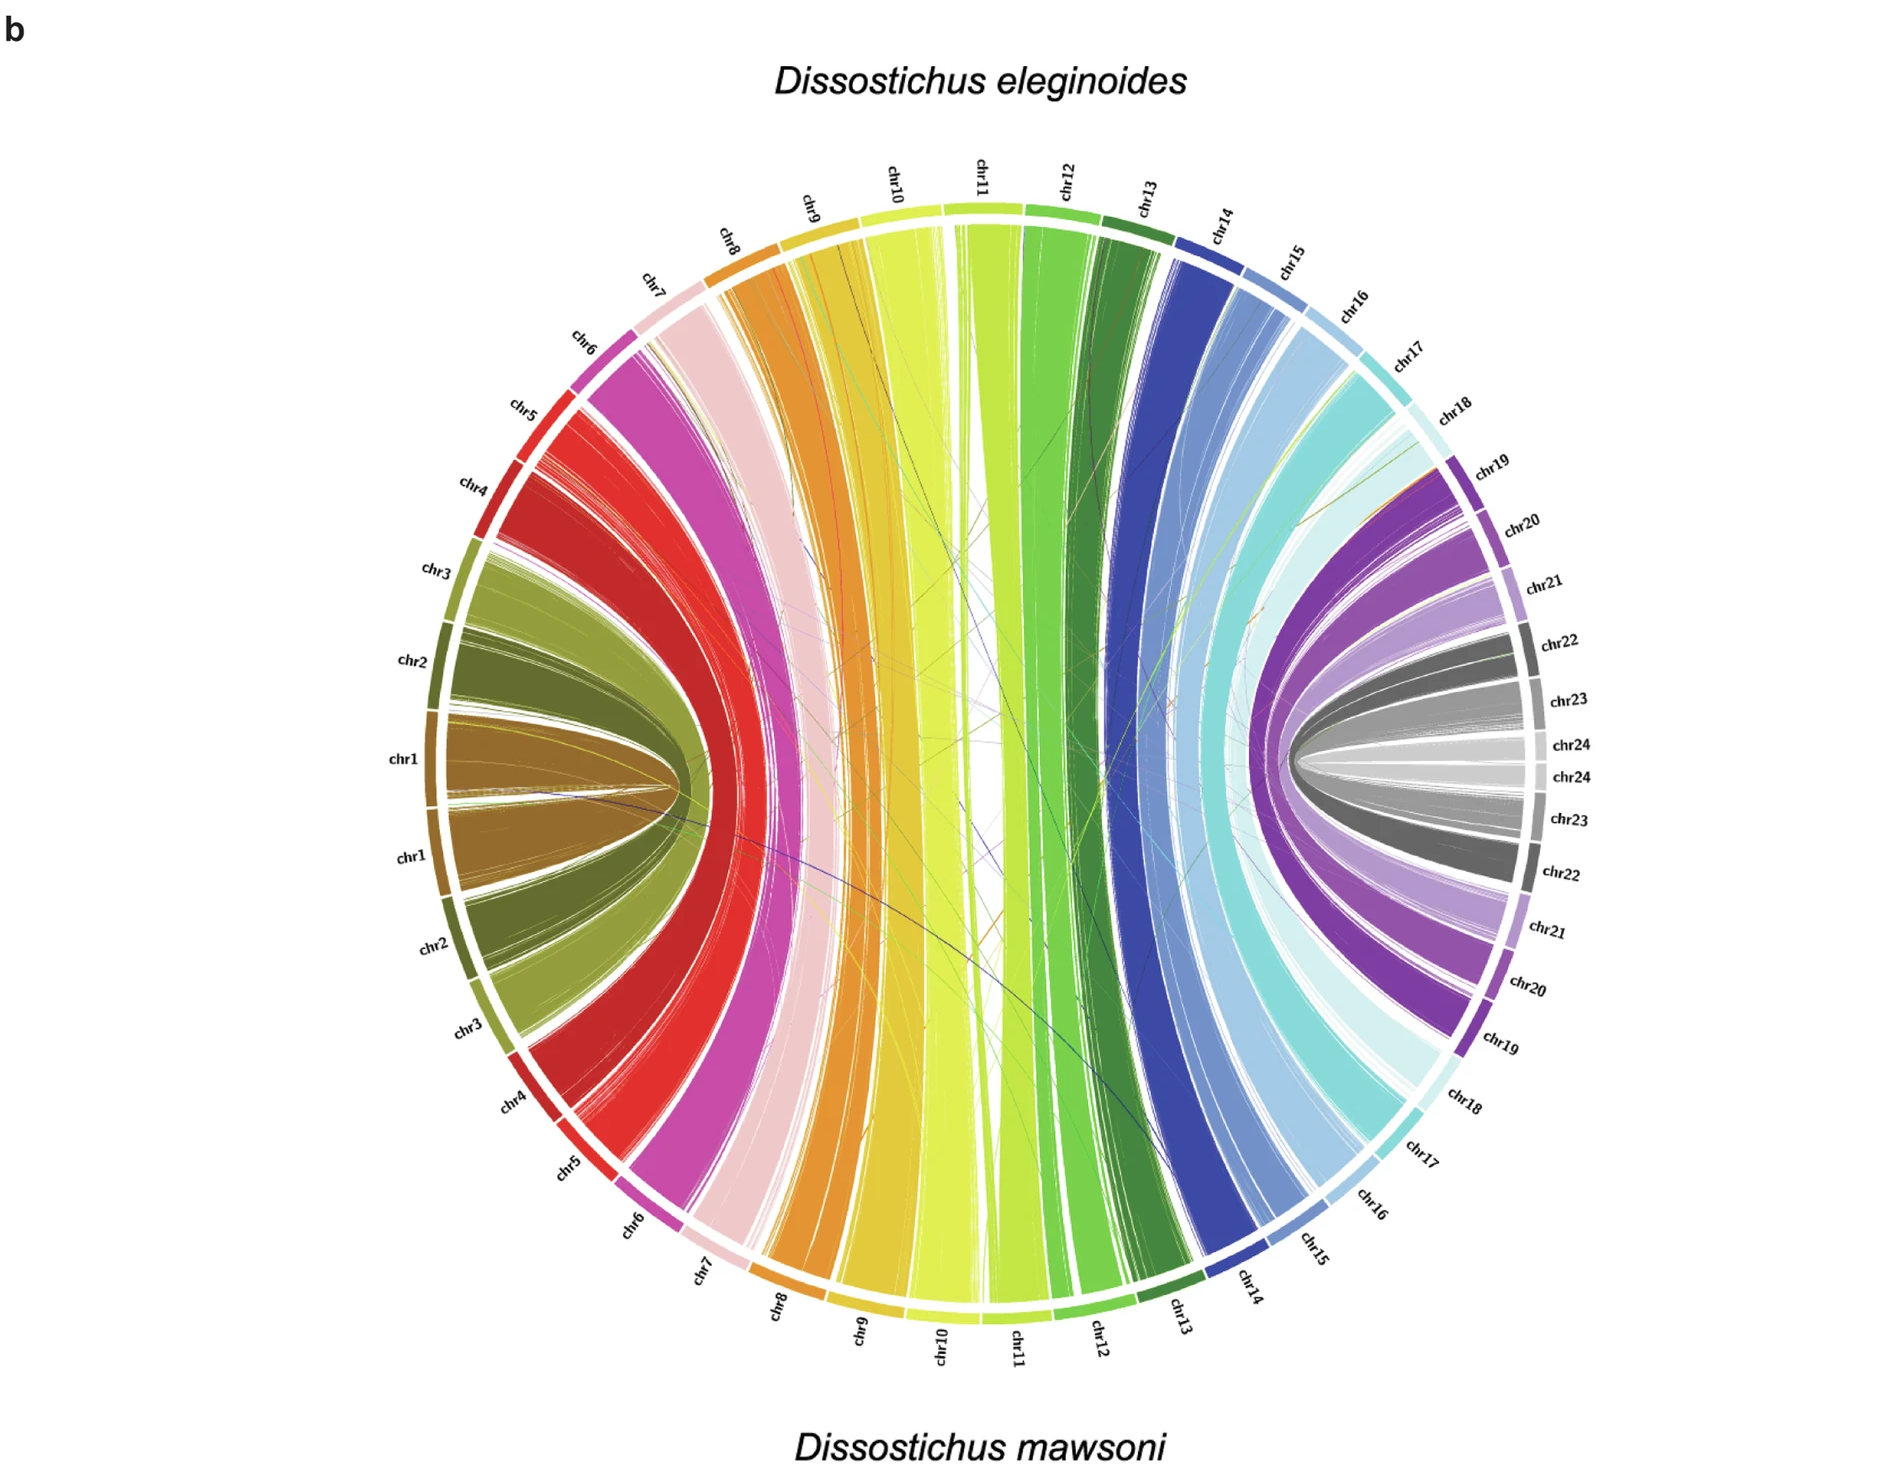
(**b**) The region of AFGP genes family. Gene locations within the AFGP gene family region of two haplotypes of D. *mawsoni* and D.*eleginoides* were compared. Color-coded according to gene type, and the orientation of the arrow reflected the orientation of the gene. The position of each gene on the genome was shown on the same scale. Trypsinogen and AFGP gene regions were color-coded.



# Part 2 Implementation of Redesign

<ipython-input-84-bbdeacc9e675>:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate("Chromosome connections: they have homologous regions", xy=(np.pi / 4, 0.9), xytext=(np.pi / 4, 1.4),


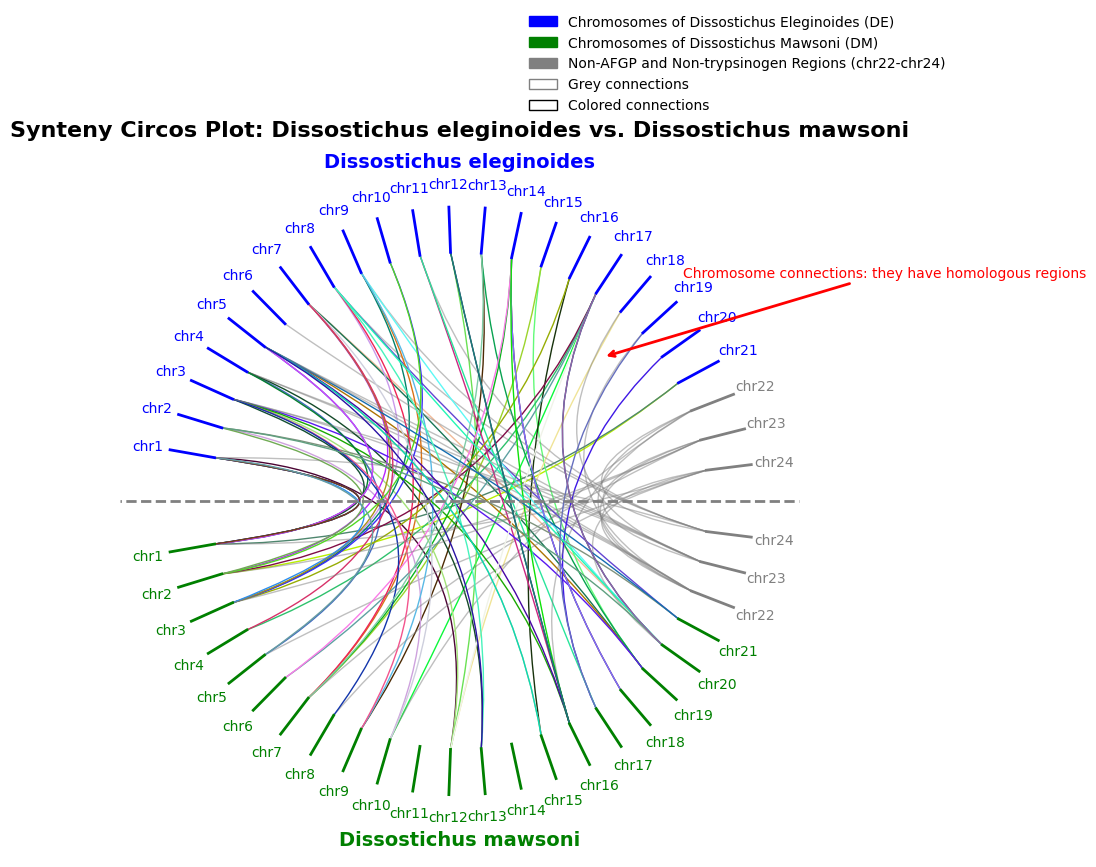

In [84]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch, Patch
from matplotlib.path import Path
import numpy as np

# Define chromosome numbers for each species
chromosomes_de = [f"chr{i}" for i in range(1, 25)]  # Dissostichus eleginoides, blue
chromosomes_dm = [f"chr{i}" for i in range(1, 25)]  # Dissostichus mawsoni, green

# Number of chromosomes
n_chromosomes = len(chromosomes_de)

# Calculate angles for circular arrangement
angles_de = np.linspace(np.pi - np.pi / 180 * 10, 0, n_chromosomes, endpoint=False)  # 180-0, anticlockwise
angles_dm = np.linspace(-np.pi + np.pi / 180 * 10, 0, n_chromosomes, endpoint=False)  # -180-0, clockwise

# Set up figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
ax.set_xticks([])
ax.set_yticks([])
ax.spines["polar"].set_visible(False)

# Add chromosomes for Dissostichus eleginoides
for i, angle in enumerate(angles_de):
    if 21 <= i <= 23:  # Chromosomes 22-24 (grey)
        ax.text(angle, 1.4, chromosomes_de[i], ha="center", va="center", fontsize=10, color="grey")
        ax.plot([angle, angle], [1.1, 1.3], color="grey", lw=2)
    else:  # Chromosomes 1-21 (blue)
        ax.text(angle, 1.4, chromosomes_de[i], ha="center", va="center", fontsize=10, color="blue")
        ax.plot([angle, angle], [1.1, 1.3], color="blue", lw=2)

# Add chromosomes for Dissostichus mawsoni
for i, angle in enumerate(angles_dm):
    if 21 <= i <= 23:  # Chromosomes 22-24 (grey)
        ax.text(angle, 1.4, chromosomes_dm[i], ha="center", va="center", fontsize=10, color="grey")
        ax.plot([angle, angle], [1.1, 1.3], color="grey", lw=2)
    else:  # Chromosomes 1-21 (green)
        ax.text(angle, 1.4, chromosomes_dm[i], ha="center", va="center", fontsize=10, color="green")
        ax.plot([angle, angle], [1.1, 1.3], color="green", lw=2)

# Generate homologous connections
np.random.seed(42)
for _ in range(100):  # Simulate 50 connections
    start_idx = np.random.randint(n_chromosomes)  # Select random DE chromosome
    end_idx = np.random.randint(n_chromosomes)  # Select random DM chromosome
    start_angle = angles_de[start_idx]  # Start from DE chromosome
    end_angle = angles_dm[end_idx]  # End at DM chromosome

    # Check if either chromosome is in the grey region (22-24)
    if 21 <= start_idx <= 23 or 21 <= end_idx <= 23:  # Grey connections
        color = "grey"
        alpha = 0.5  # Optional: Make grey connections slightly transparent
    else:  # Colored connections
        color = np.random.rand(3)  # Random RGB color
        alpha = 1  # Optional: Make colored connections not transparent

    # Adjust radii to align with chromosome bands
    verts = [
        (start_angle, 1.1),  # Starting point (near DE chromosome radius)
        ((start_angle + end_angle) / 2, 0.2),  # Control point (midway for smooth curve)
        (end_angle, 1.1),  # Ending point (near DM chromosome radius)
    ]
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor="none", edgecolor=color, lw=1.0, alpha=alpha)
    ax.add_patch(patch)

# Add dividing line
ax.plot([np.pi, 0], [0, 1.5], color="gray", linestyle="--", lw=2)
ax.plot([0, np.pi], [0, 1.5], color="gray", linestyle="--", lw=2)

# Add headings
ax.text(np.pi / 2, 1.5, "Dissostichus eleginoides", ha="center", va="center", fontsize=14, color="blue", weight="bold")
ax.text(-np.pi / 2, 1.5, "Dissostichus mawsoni", ha="center", va="center", fontsize=14, color="green", weight="bold")

# Add legend
legend_elements = [
    Patch(facecolor="blue", edgecolor="blue", label="Chromosomes of Dissostichus Eleginoides (DE)"),
    Patch(facecolor="green", edgecolor="green", label="Chromosomes of Dissostichus Mawsoni (DM)"),
    Patch(facecolor="grey", edgecolor="grey", label="Non-AFGP and Non-trypsinogen Regions (chr22-chr24)"),
    Patch(facecolor="none", edgecolor="grey", label="Grey connections", linestyle="-"),
    Patch(facecolor="none", edgecolor="black", label="Colored connections", linestyle="-"),
]
ax.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 1.2), fontsize=10, frameon=False)

# Add annotations
ax.annotate("Chromosome connections: they have homologous regions", xy=(np.pi / 4, 0.9), xytext=(np.pi / 4, 1.4),
            arrowprops=dict(facecolor="black", arrowstyle="->", lw=2, color="red"), fontsize=10, color="red")

# Add title
plt.title("Synteny Circos Plot: Dissostichus eleginoides vs. Dissostichus mawsoni", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


In [78]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00


In [83]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np
from ipywidgets import VBox, Checkbox, interactive_output

# Define chromosome numbers for each species
chromosomes_de = [f"chr{i}" for i in range(1, 25)]  # Dissostichus eleginoides, blue
chromosomes_dm = [f"chr{i}" for i in range(1, 25)]  # Dissostichus mawsoni, green

# Number of chromosomes
n_chromosomes = len(chromosomes_de)

# Calculate angles for circular arrangement
angles_de = np.linspace(np.pi - np.pi / 180 * 10, 0, n_chromosomes, endpoint=False)  # 180-0, anticlockwise
angles_dm = np.linspace(-np.pi + np.pi / 180 * 10, 0, n_chromosomes, endpoint=False)  # -180-0, clockwise

# Function to draw chromosomes and connections based on selected filters
def plot_synteny(de_visible=True, dm_visible=True, connections_visible=True):
    # Set up figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["polar"].set_visible(False)

    # Add chromosomes for Dissostichus eleginoides
    for i, angle in enumerate(angles_de):
        if 21 <= i <= 23:  # Chromosomes 22-24 (grey)
            color = "grey"
        else:  # Chromosomes 1-21 (blue)
            color = "blue"
        if de_visible:
            ax.text(angle, 1.4, chromosomes_de[i], ha="center", va="center", fontsize=10, color=color)
            ax.plot([angle, angle], [1.1, 1.3], color=color, lw=2)

    # Add chromosomes for Dissostichus mawsoni
    for i, angle in enumerate(angles_dm):
        if 21 <= i <= 23:  # Chromosomes 22-24 (grey)
            color = "grey"
        else:  # Chromosomes 1-21 (green)
            color = "green"
        if dm_visible:
            ax.text(angle, 1.4, chromosomes_dm[i], ha="center", va="center", fontsize=10, color=color)
            ax.plot([angle, angle], [1.1, 1.3], color=color, lw=2)

    # Generate homologous connections
    if connections_visible:
        np.random.seed(42)
        for _ in range(100):  # Simulate 100 connections
            start_idx = np.random.randint(n_chromosomes)  # Select random DE chromosome
            end_idx = np.random.randint(n_chromosomes)  # Select random DM chromosome
            start_angle = angles_de[start_idx]  # Start from DE chromosome
            end_angle = angles_dm[end_idx]  # End at DM chromosome

            # Check if either chromosome is in the grey region (22-24)
            if 21 <= start_idx <= 23 or 21 <= end_idx <= 23:  # Grey connections
                color = "grey"
            else:  # Colored connections
                color = np.random.rand(3)

            # Adjust radii to align with chromosome bands
            verts = [
                (start_angle, 1.1),  # Starting point (near DE chromosome radius)
                ((start_angle + end_angle) / 2, 0.2),  # Control point (midway for smooth curve)
                (end_angle, 1.1),  # Ending point (near DM chromosome radius)
            ]
            codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
            path = Path(verts, codes)
            patch = PathPatch(path, facecolor="none", edgecolor=color, lw=1.0)
            ax.add_patch(patch)

    # Add dividing line
    ax.plot([np.pi, 0], [0, 1.5], color="gray", linestyle="--", lw=2)
    ax.plot([0, np.pi], [0, 1.5], color="gray", linestyle="--", lw=2)

    # Add headings
    if de_visible:
        ax.text(np.pi / 2, 1.5, "Dissostichus eleginoides", ha="center", va="center", fontsize=14, color="blue", weight="bold")
    if dm_visible:
        ax.text(-np.pi / 2, 1.5, "Dissostichus mawsoni", ha="center", va="center", fontsize=14, color="green", weight="bold")

    # Add title
    plt.title("Synteny Circos Plot: Dissostichus eleginoides vs. Dissostichus mawsoni", fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()

# Create checkboxes for interactivity
de_checkbox = Checkbox(value=True, description="Dissostichus eleginoides Chromosomes", indent=False)
dm_checkbox = Checkbox(value=True, description="Dissostichus mawsoni Chromosomes", indent=False)
connections_checkbox = Checkbox(value=True, description="Connections", indent=False)

# Link checkboxes to the interactive plot function
ui = VBox([de_checkbox, dm_checkbox, connections_checkbox])

out = interactive_output(
    plot_synteny,
    {"de_visible": de_checkbox, "dm_visible": dm_checkbox, "connections_visible": connections_checkbox},
)

# Display the interactive widgets and plot
display(ui, out)


Output()